In [ ]:
!pip install --upgrade --force-reinstall seaborn patsy

In [8]:
import pandas as pd
from scipy import stats
from scipy.stats import bartlett
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/DUE.csv")
dfSemTratamento = pd.read_csv("/content/DUE-SEM-TRATAMENTO.csv")


In [ ]:
df

In [30]:
dfSemTratamento

,Tratamento,Eficacia,Eficiencia
0,DUE_T,11.1,14.7
1,DUE_T,11.6,27.5
2,DUE_T,4.8,6.4
3,DUE_T,2.6,8.1
4,DUE_T,22.2,37.1
5,DUE_T,6.9,7.8
6,DUE_T,12.7,17.8
7,DUE_T,31.7,14.8
8,DUE_T,8.5,14.5
9,DUE_NT,7.9,20.9


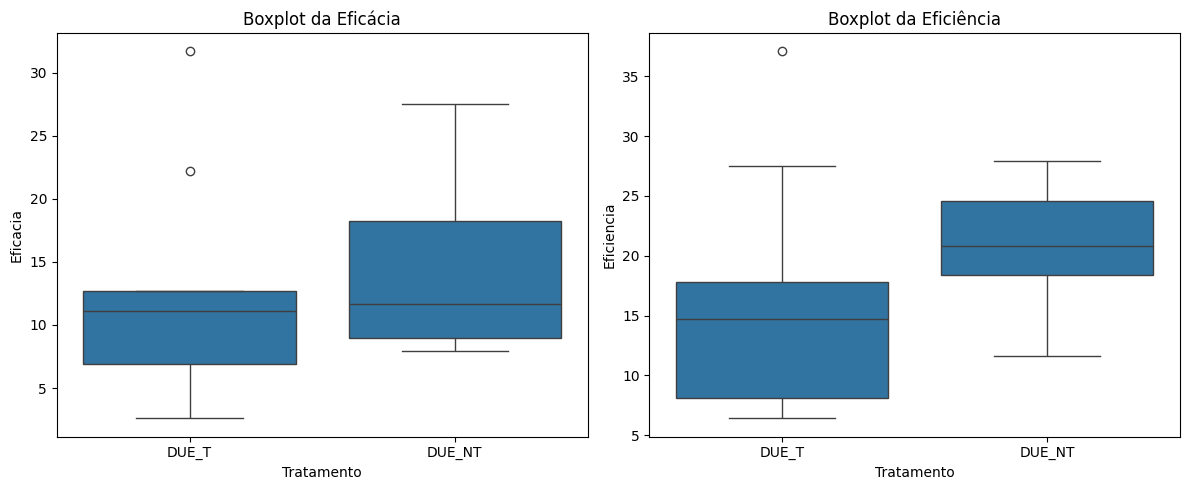

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Tratamento", y="Eficacia", data=dfSemTratamento)
plt.title("Boxplot da Eficácia")

plt.subplot(1, 2, 2)
sns.boxplot(x="Tratamento", y="Eficiencia", data=dfSemTratamento)
plt.title("Boxplot da Eficiência")

plt.tight_layout()
plt.show()


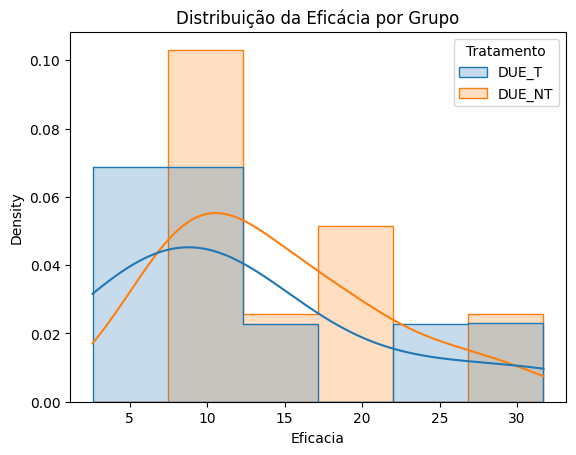

In [14]:
sns.histplot(data=dfSemTratamento, x='Eficacia', hue='Tratamento', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição da Eficácia por Grupo')
plt.show()

📊 O grupo Treinado parece ter uma distribuição de eficácia mais espalhada, com valores que se estendem mais para o alto.

O grupo Não Treinado tem eficácia mais concentrada em faixas mais baixas e médias.

Isso pode indicar que o treinamento está associado a maior variação e possivelmente valores mais altos de eficácia

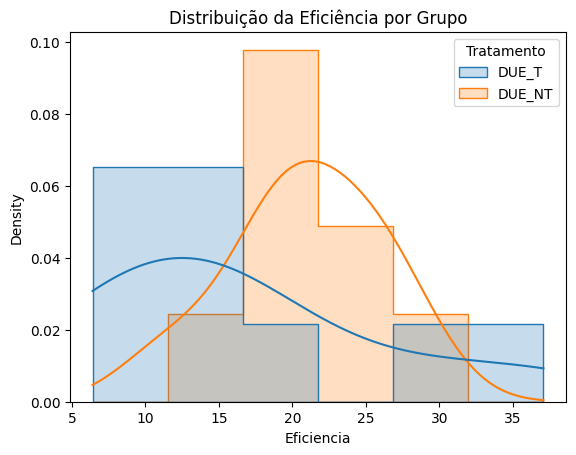

In [16]:
sns.histplot(data=dfSemTratamento, x='Eficiencia', hue='Tratamento', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição da Eficiência por Grupo')
plt.show()

📊 O grupo Treinado parece ter maior variabilidade nos níveis de eficiência, com alguns indivíduos com eficiências muito baixas ou muito altas.

O grupo Não Treinado tem uma eficiência mais consistente, centrada em torno de valores médios (~20 a 25).

Isso não significa necessariamente que o grupo não treinado é mais eficiente — para isso precisamos olhar a média e o desvio padrão, e realizar um teste estatístico.

In [24]:
grupo_treinado = df[df['Tratamento'] == 'DUE_T']
grupo_nao_treinado = df[df['Tratamento'] == 'DUE_NT']


In [25]:
print("🎯 Testes de Normalidade (Shapiro-Wilk):\n")

for metrica in ['Eficacia', 'Eficiencia']:
    stat_t, p_t = stats.shapiro(grupo_treinado[metrica])
    stat_nt, p_nt = stats.shapiro(grupo_nao_treinado[metrica])

    media_t = grupo_treinado[metrica].mean()
    std_t = grupo_treinado[metrica].std()

    media_nt = grupo_nao_treinado[metrica].mean()
    std_nt = grupo_nao_treinado[metrica].std()


    print(f"{metrica} - Treinado: p = {p_t:.4f}, média = {media_t:.2f}, desvio padrão = {std_t:.2f}")
    print(f"{metrica} - Não Treinado: p = {p_nt:.4f}, média = {media_nt:.2f}, desvio padrão = {std_nt:.2f}")
    print("→ Normal" if p_t > 0.05 and p_nt > 0.05 else "→ Pode não ser normal")
    print("")


🎯 Testes de Normalidade (Shapiro-Wilk):

Eficacia - Treinado: p = 0.6711, média = 8.31, desvio padrão = 3.76
Eficacia - Não Treinado: p = 0.1291, média = 14.21, desvio padrão = 6.82
→ Normal

Eficiencia - Treinado: p = 0.2843, média = 13.83, desvio padrão = 7.40
Eficiencia - Não Treinado: p = 0.9117, média = 20.88, desvio padrão = 5.15
→ Normal



In [26]:
stat_bartlett, p_bartlett = bartlett(grupo_treinado['Eficacia'], grupo_nao_treinado['Eficacia'])
print("📌 Testes de Homogeneidade de Variância para a Eficacia (Bartlett):\n")
print(f"Não há evidência estatística para dizer que as variâncias dos grupos (Treinado e Não Treinado) são diferentes."
if p_bartlett > 0.05
else "Há evidência estatística para dizer que as variâncias dos grupos (Treinado e Não Treinado) são diferentes.")
print(f"Bartlett para Eficacia: p = {p_bartlett:.4f}")


📌 Testes de Homogeneidade de Variância para a Eficacia (Bartlett):

Não há evidência estatística para dizer que as variâncias dos grupos (Treinado e Não Treinado) são diferentes.
Bartlett para Eficacia: p = 0.1616


In [27]:
stat_bartlett, p_bartlett = bartlett(grupo_treinado['Eficiencia'], grupo_nao_treinado['Eficiencia'])
print("📌 Testes de Homogeneidade de Variância para a Eficiência (Bartlett):\n")
print(f"Não há evidência estatística para dizer que as variâncias dos grupos (Treinado e Não Treinado) são diferentes."
if p_bartlett > 0.05
else "Há evidência estatística para dizer que as variâncias dos grupos (Treinado e Não Treinado) são diferentes.")
print(f"Bartlett para Eficiencia: p = {p_bartlett:.4f}")

📌 Testes de Homogeneidade de Variância para a Eficiência (Bartlett):

Não há evidência estatística para dizer que as variâncias dos grupos (Treinado e Não Treinado) são diferentes.
Bartlett para Eficiencia: p = 0.3760


#♟ Hipóteses
###H01:
There is no difference in terms of effectiveness
in using the DUE technologies to find user interaction
problems with or without training.
###HA1:
The Web DUE technologies present a
difference in the effectiveness indicator, when applied
without training.
###H02:
There is no difference in terms of efficiency in
using the DUE technologies to find user interaction
problems with or without training.
###HA2:
The Web DUE technologies present a
difference in the efficiency indicator, when applied
without training.

In [28]:
# Teste T de Student
t_eficacia, p_eficacia = stats.ttest_ind(grupo_treinado['Eficacia'], grupo_nao_treinado['Eficacia'])
t_eficiencia, p_eficiencia = stats.ttest_ind(grupo_treinado['Eficiencia'], grupo_nao_treinado['Eficiencia'])

In [29]:
print("📌 Testes de Hipóteses (t-teste independente):\n")
print(f"Eficácia: t = {t_eficacia:.2f}, p = {p_eficacia:.4f}")
print("→ Rejeita H0" if p_eficacia < 0.05 else "→ Não rejeita H0")
print("")
print(f"Eficiência: t = {t_eficiencia:.2f}, p = {p_eficiencia:.4f}")
print("→ Rejeita H0 - There is no difference in terms of efficiency in using the DUE technologies to find user interaction problems with or without training."
      if p_eficiencia < 0.05 else "→ Não rejeita H0")


📌 Testes de Hipóteses (t-teste independente):

Eficácia: t = -2.03, p = 0.0636
→ Não rejeita H0

Eficiência: t = -2.17, p = 0.0495
→ Rejeita H0
